# model_evaluation_and_training_curves.ipynb

**Project**: Lumbar Spine Degenerative Classification  
**Description**: This notebook loads the training log from a model folder to plot training/validation loss and accuracy curves, and then evaluates the best model saved in `best_model.pth`.

---

## Table of Contents
1. [Environment and Imports](#section1)  
2. [Define Model Folder and Parse Parameters](#section2)  
3. [Plot Training Curves](#section3)  
4. [Evaluate the Best Model](#section4)


<a id="section1"></a>
## 1. Environment and Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import yaml

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

print("Current working directory:", os.getcwd())

Current working directory: /home/jkskw/git/ml_lumbar_mri


<a id="section2"></a>
## 2. Define Model Folder and Parse Parameters

In [2]:
def parse_model_folder_params(folder_name):
    """
    Parse training parameters from the model folder name.
    
    Expected folder name format (split by '_'):
      [model_arch, class_mode_part1, class_mode_part2,
       selected_tensor_folder_part1, selected_tensor_folder_part2,
       selected_tensor_folder_part3, selected_tensor_folder_part4, selected_tensor_folder_part5,
       batch_size, num_epochs, learning_rate]
    """
    parts = folder_name.split("_")
    if len(parts) < 11:
        raise ValueError("Model folder name does not follow the expected pattern.")
    
    model_arch = parts[0]
    classification_mode = parts[1] + "_" + parts[2]
    # Join parts 3 to 7 for the selected tensor folder
    selected_tensor_folder = "_".join(parts[3:8])
    try:
        batch_size = int(parts[8])
        num_epochs = int(parts[9])
        learning_rate = float(parts[10])
    except ValueError as e:
        raise ValueError("Error parsing numeric parameters from folder name: " + str(e))
    
    return {
        "model_arch": model_arch,
        "classification_mode": classification_mode,
        "selected_tensor_folder": selected_tensor_folder,
        "batch_size": batch_size,
        "num_epochs": num_epochs,
        "learning_rate": learning_rate,
    }

In [3]:
# Define the model folder path
MODEL_FOLDER = "models/resnet3d_multi_multiclass_target_window_128x128_5D_B2A2_16_30_0.001_0.2_20250308_190927"

# Check if the folder exists
if os.path.exists(MODEL_FOLDER):
    print("Model folder found:", MODEL_FOLDER)
else:
    raise FileNotFoundError(f"Model folder not found: {MODEL_FOLDER}")

# Extract parameters from the folder name
folder_params = parse_model_folder_params(os.path.basename(MODEL_FOLDER))
print("Extracted parameters from folder name:")
for key, value in folder_params.items():
    print(f"  {key}: {value}")

Model folder found: models/resnet3d_multi_multiclass_target_window_128x128_5D_B2A2_16_30_0.001_0.2_20250308_190927
Extracted parameters from folder name:
  model_arch: resnet3d
  classification_mode: multi_multiclass
  selected_tensor_folder: target_window_128x128_5D_B2A2
  batch_size: 16
  num_epochs: 30
  learning_rate: 0.001


<a id="section3"></a>
## 3. Plot Training Curves
- Training and Validation Loss  
- Training and Validation Accuracy

Training log shape: (20, 5)


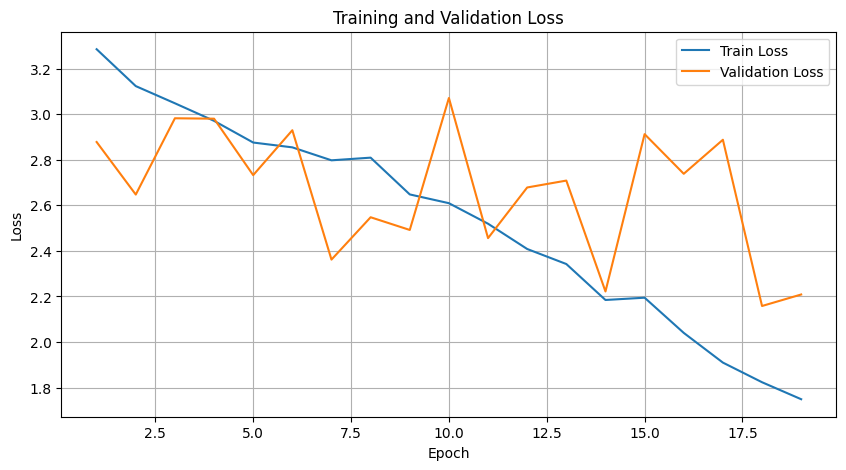

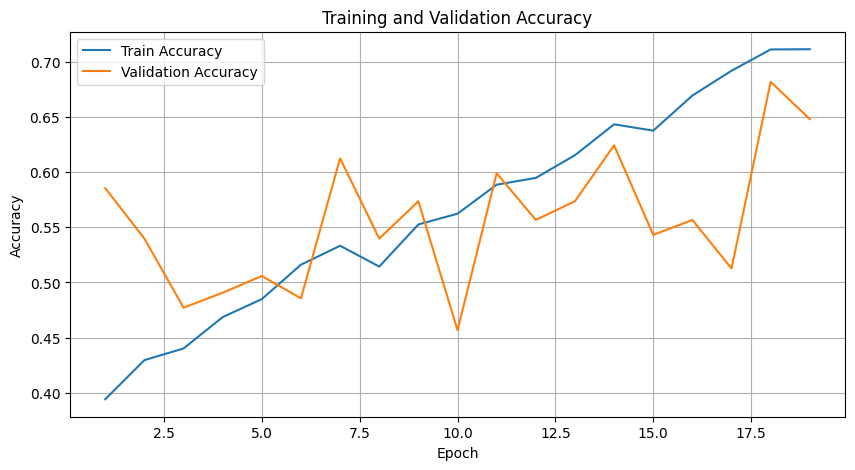

In [4]:
# Define the path to the training_log.csv file
log_csv_path = os.path.join(MODEL_FOLDER, "training_log.csv")

# Load the CSV file
df_log = pd.read_csv(log_csv_path)
print("Training log shape:", df_log.shape)

# Plot Loss
plt.figure(figsize=(10, 5))
plt.plot(df_log["epoch"], df_log["train_loss"], label="Train Loss")
plt.plot(df_log["epoch"], df_log["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(10, 5))
plt.plot(df_log["epoch"], df_log["train_acc"], label="Train Accuracy")
plt.plot(df_log["epoch"], df_log["val_acc"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


<a id="section4"></a>
## 4. Evaluate the Best Model

Temporary config file created at: /tmp/temp_config.yml
Best model found: models/resnet3d_multi_multiclass_target_window_128x128_5D_B2A2_16_30_0.001_0.2_20250308_190927/best_model.pth
[INFO] Loading model from models/resnet3d_multi_multiclass_target_window_128x128_5D_B2A2_16_30_0.001_0.2_20250308_190927/best_model.pth using arch=resnet3d


Evaluating on test set:   0%|          | 0/13 [00:00<?, ?it/s]

/home/jkskw/git/ml_lumbar_mri/venv/lib/python3.12/site-packages/torch/nn/functional.py:1597: UserWarning: dropout3d: Received a 2-D input to dropout3d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout3d exists to provide channel-wise dropout on inputs with 3 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 4D or 5D inputs).
  warnings.warn(warn_msg)


[INFO] Evaluation Completed.

=== Metrics for SCS ===
Accuracy: 0.8020
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       149
           1       0.38      0.25      0.30        24
           2       0.48      0.83      0.61        24

    accuracy                           0.80       197
   macro avg       0.60      0.66      0.61       197
weighted avg       0.82      0.80      0.80       197

Confusion Matrix:
 [[132   7  10]
 [  6   6  12]
 [  1   3  20]] 



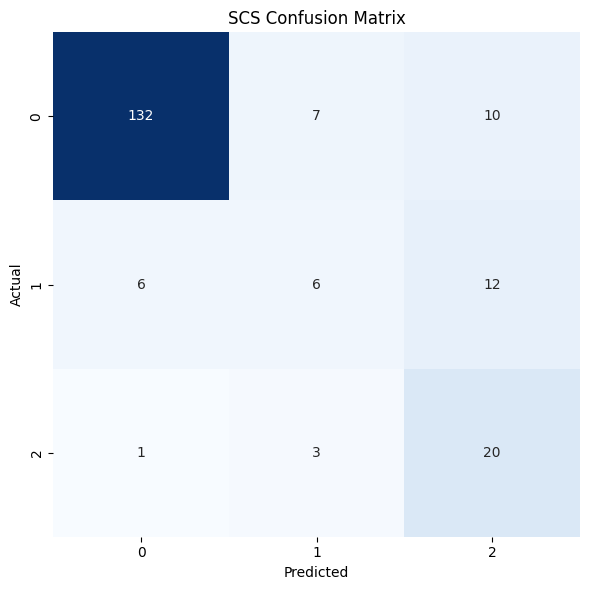

=== Metrics for LNfN ===
Accuracy: 0.6244
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       122
           1       0.62      0.25      0.35        65
           2       0.17      0.30      0.21        10

    accuracy                           0.62       197
   macro avg       0.49      0.47      0.44       197
weighted avg       0.63      0.62      0.60       197

Confusion Matrix:
 [[104   9   9]
 [ 43  16   6]
 [  6   1   3]] 



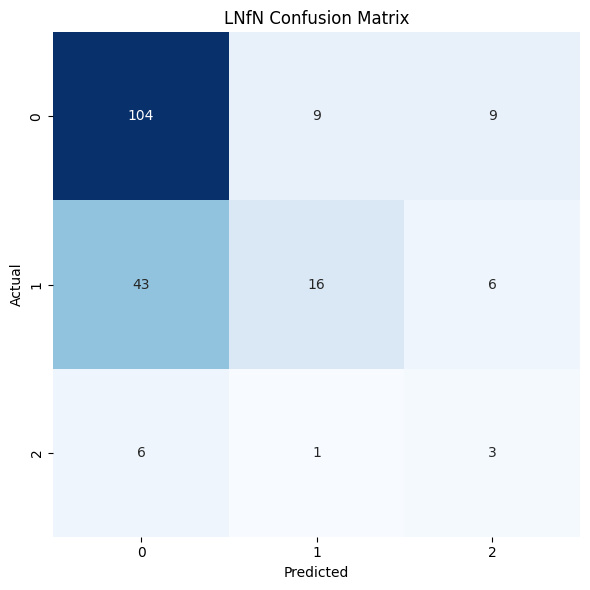

=== Metrics for RNfN ===
Accuracy: 0.5990
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.71       124
           1       0.43      0.33      0.38        66
           2       0.29      0.29      0.29         7

    accuracy                           0.60       197
   macro avg       0.46      0.46      0.46       197
weighted avg       0.58      0.60      0.59       197

Confusion Matrix:
 [[94 27  3]
 [42 22  2]
 [ 3  2  2]] 



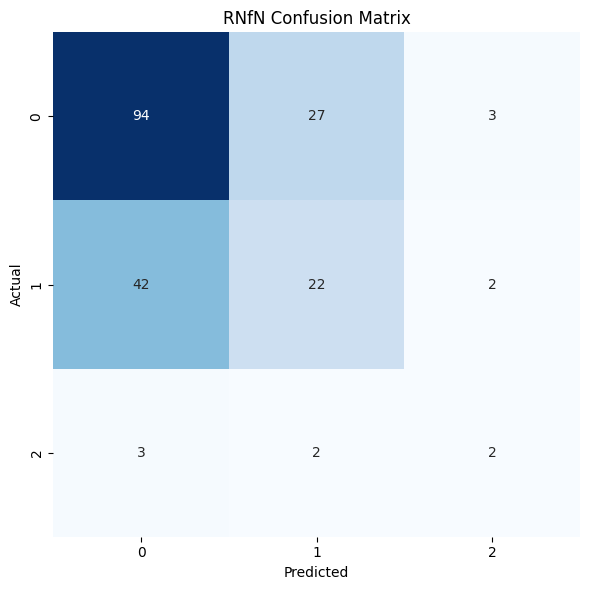

Temporary config file removed.


In [7]:
import tempfile

# Load the default configuration from 'config.yml'
with open("config.yml", "r") as f:
    config = yaml.safe_load(f)

# Update the training parameters using the extracted folder parameters
config["training"]["model_arch"] = folder_params["model_arch"]
config["training"]["classification_mode"] = folder_params["classification_mode"]
config["training"]["selected_tensor_folder"] = folder_params["selected_tensor_folder"]
config["training"]["batch_size"] = folder_params["batch_size"]
config["training"]["num_epochs"] = folder_params["num_epochs"]
config["training"]["learning_rate"] = folder_params["learning_rate"]

# Save the updated configuration to a temporary file (so original config.yml is not modified)
temp_config_path = os.path.join(tempfile.gettempdir(), "temp_config.yml")
with open(temp_config_path, "w") as f:
    yaml.dump(config, f, default_flow_style=False)
print("Temporary config file created at:", temp_config_path)

# Define the path to the best model file
best_model_path = os.path.join(MODEL_FOLDER, "best_model.pth")
if os.path.exists(best_model_path):
    print("Best model found:", best_model_path)
else:
    raise FileNotFoundError(f"Best model file not found at: {best_model_path}")

# Import the evaluate_model function from the evaluation module
from src.evaluate.evaluate_model import evaluate_model

# Evaluate the model using the temporary configuration file
evaluate_model(model_path=best_model_path, config_path=temp_config_path, split="test")

# Optionally, remove the temporary config file after evaluation
os.remove(temp_config_path)
print("Temporary config file removed.")